In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Importing The Dataset

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_651a44c6256d4289950e25263ac926ad = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_651a44c6256d4289950e25263ac926ad = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_651a44c6256d4289950e25263ac926ad = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QaG9CCaAbuUWvmoq8UTBa8Oh9b4PM-yFULVsGptC0J94',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_651a44c6256d4289950e25263ac926ad)

body = client_651a44c6256d4289950e25263ac926ad.get_object(Bucket='waterqualitydrinkingwaterpotabili-donotdelete-pr-y19ucaazm8kmih',Key='water_potability.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [5]:
df = df.dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [6]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [7]:
df_notpotable  = df[df['Potability']==0]
df_potable = df[df['Potability']==1]

df_notpotable.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [8]:
df_potable_resample = resample(df_potable, replace = True, n_samples = 1200, random_state = 0)

In [9]:
df = pd.concat([df_notpotable, df_potable_resample])
df.Potability.value_counts()

0    1200
1    1200
Name: Potability, dtype: int64

In [10]:
df = shuffle(df, random_state=0) 

# Deep Learning

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.layers import Activation
from sklearn.metrics import accuracy_score

In [12]:
x = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [13]:
st = StandardScaler()
x_columns= x.columns
x[x_columns] = st.fit_transform(x[x_columns])

In [14]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3225,0.886836,-1.959760,-0.101990,0.520706,0.298084,-0.811575,-1.094072,-0.140666,-1.367187
561,-0.305747,-0.728478,-0.819385,-0.044076,0.141303,-0.249905,0.386441,-0.515110,0.490391
2322,1.334503,1.427180,0.728499,-0.203641,-1.672090,1.768747,-1.884166,-1.163543,-0.518518
1977,0.050960,0.336155,0.451849,0.394043,-0.268781,0.736269,0.361951,-1.107368,1.012251
973,-1.715971,1.389395,0.251030,1.603773,0.132009,1.341039,-0.752171,0.144341,1.388621


In [15]:
x.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03
mean,4.855375e-16,2.427688e-16,1.051011e-16,-4.633331e-16,-1.096900e-15,-2.753353e-16,-5.713948e-16,-1.961394e-16,5.247654e-16
std,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00
min,-3.949555e+00,-3.793180e+00,-2.514301e+00,-3.531082e+00,-4.864670e+00,-2.784957e+00,-3.668361e+00,-3.661512e+00,-3.186855e+00
25%,-6.437116e-01,-5.884188e-01,-7.393425e-01,-6.051879e-01,-6.284983e-01,-7.554791e-01,-6.897268e-01,-6.315345e-01,-6.687663e-01
50%,-4.653725e-02,3.572745e-02,-1.225582e-01,2.938824e-03,-3.776914e-02,-4.298161e-02,-1.222659e-02,-1.652648e-04,2.578213e-03
75%,6.170089e-01,6.206727e-01,6.173876e-01,6.191037e-01,6.072930e-01,6.963691e-01,7.355617e-01,6.685573e-01,6.907318e-01
max,4.463777e+00,3.258894e+00,4.025774e+00,3.662361e+00,3.549411e+00,4.064490e+00,3.806757e+00,3.604225e+00,3.246077e+00


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [17]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test, test_size = 0.5, random_state = 0)

In [18]:
X_train.shape

(1920, 9)

In [19]:
# model = models.Sequential()

# model.add(layers.Dense(16, input_shape=(9,)))
# model.add(LeakyReLU(alpha=0.01))

# model.add(layers.Dense(32))
# model.add(BatchNormalization())
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(rate=0.1))

# model.add(layers.Dense(16))
# model.add(BatchNormalization())
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(rate=0.1))

# model.add(layers.Dense(1))
# model.add(Activation("sigmoid"))

In [20]:
model = models.Sequential()

model.add(layers.Dense(16, input_shape=(9,)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(layers.Dense(32))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(layers.Dense(16))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(layers.Dense(1))
model.add(Activation("sigmoid"))

In [21]:
opt = Adam(learning_rate=0.001)

model.compile(loss="binary_crossentropy",
              optimizer=opt,
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5

In [23]:
tf.random.set_seed(0)

history = model.fit(X_train,
                    Y_train,
                    epochs=300,
                    batch_size=32,
                    validation_data=(X_val, Y_val),
                   )

Epoch 1/300
60/60 [==============================] - 1s 9ms/step - loss: 0.7523 - accuracy: 0.5150 - val_loss: 0.6928 - val_accuracy: 0.5375
Epoch 2/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5944 - val_loss: 0.6775 - val_accuracy: 0.6000
Epoch 3/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6072 - val_loss: 0.6620 - val_accuracy: 0.6167
Epoch 4/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6297 - val_loss: 0.6502 - val_accuracy: 0.6333
Epoch 5/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.6303 - val_loss: 0.6370 - val_accuracy: 0.6250
Epoch 6/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.6355 - val_loss: 0.6301 - val_accuracy: 0.6375
Epoch 7/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.6512 - val_loss: 0.6275 - val_accuracy: 0.6333
Epoch 8/300
6

Epoch 59/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7921 - val_loss: 0.6063 - val_accuracy: 0.6833
Epoch 60/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.7845 - val_loss: 0.6036 - val_accuracy: 0.6917
Epoch 61/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7648 - val_loss: 0.5970 - val_accuracy: 0.6917
Epoch 62/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.7939 - val_loss: 0.5915 - val_accuracy: 0.6875
Epoch 63/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7789 - val_loss: 0.5932 - val_accuracy: 0.7083
Epoch 64/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8045 - val_loss: 0.5960 - val_accuracy: 0.7000
Epoch 65/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7772 - val_loss: 0.6010 - val_accuracy: 0.6833
Epoch 

60/60 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8176 - val_loss: 0.5943 - val_accuracy: 0.7000
Epoch 117/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.7747 - val_loss: 0.6041 - val_accuracy: 0.7208
Epoch 118/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.7910 - val_loss: 0.6123 - val_accuracy: 0.7167
Epoch 119/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8168 - val_loss: 0.5898 - val_accuracy: 0.7125
Epoch 120/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7875 - val_loss: 0.6007 - val_accuracy: 0.7125
Epoch 121/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8056 - val_loss: 0.6109 - val_accuracy: 0.7167
Epoch 122/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.7968 - val_loss: 0.6044 - val_accuracy: 0.7167
Epoch 123/300

60/60 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8198 - val_loss: 0.6146 - val_accuracy: 0.7250
Epoch 174/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8244 - val_loss: 0.6182 - val_accuracy: 0.7167
Epoch 175/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8171 - val_loss: 0.6169 - val_accuracy: 0.7292
Epoch 176/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8283 - val_loss: 0.6090 - val_accuracy: 0.7417
Epoch 177/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8060 - val_loss: 0.6099 - val_accuracy: 0.7375
Epoch 178/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.7998 - val_loss: 0.6018 - val_accuracy: 0.7458
Epoch 179/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8071 - val_loss: 0.6185 - val_accuracy: 0.7208
Epoch 180/300

60/60 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8168 - val_loss: 0.6547 - val_accuracy: 0.7208
Epoch 231/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8408 - val_loss: 0.6276 - val_accuracy: 0.7250
Epoch 232/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8221 - val_loss: 0.6484 - val_accuracy: 0.7167
Epoch 233/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8294 - val_loss: 0.6668 - val_accuracy: 0.7167
Epoch 234/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8392 - val_loss: 0.6530 - val_accuracy: 0.7292
Epoch 235/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8413 - val_loss: 0.6402 - val_accuracy: 0.7333
Epoch 236/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8184 - val_loss: 0.6371 - val_accuracy: 0.7500
Epoch 237/300

60/60 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8146 - val_loss: 0.6285 - val_accuracy: 0.7500
Epoch 288/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8296 - val_loss: 0.6513 - val_accuracy: 0.7417
Epoch 289/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8215 - val_loss: 0.6330 - val_accuracy: 0.7500
Epoch 290/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8152 - val_loss: 0.6808 - val_accuracy: 0.7125
Epoch 291/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8386 - val_loss: 0.6808 - val_accuracy: 0.7125
Epoch 292/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8340 - val_loss: 0.6768 - val_accuracy: 0.7250
Epoch 293/300
60/60 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8254 - val_loss: 0.6413 - val_accuracy: 0.7042
Epoch 294/300

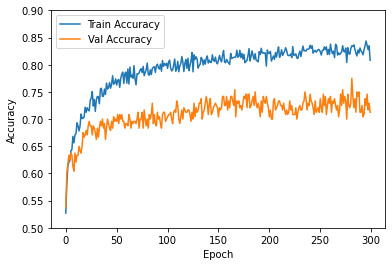

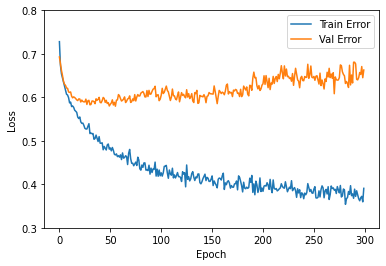

In [24]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
  plt.ylim([0.5,0.9])
  plt.legend()
  plt.show()
    
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0.3,0.8])
  plt.legend()
  plt.show()


plot_history(history)

In [25]:
score = model.evaluate(X_test, Y_test, verbose=1)

print("Test Error", score[0])
print("Test accuracy", score[1])

8/8 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.7708
Test Error 0.5238449573516846
Test accuracy 0.7708333134651184


### Finally the Deep Learning Model :  with accuracy 75~77 %